In [ ]:
!pip install azure-storage-blob

     |████████████████████████████████| 356 kB 13.0 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 3.6 MB 48.9 MB/s 
     |████████████████████████████████| 178 kB 45.8 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 


# Data

## Drive Instructions
Files uploaded to a notebook are temporary.
To tackle that issue, we're mounting our files on a separate google drive that gets mounted, which is this one: https://drive.google.com/drive/folders/1Z36CIe5KJhe0kF8bU0H39iaAGjtvlEBf?usp=sharing

You will have to Click on "Add Folder as Shortcut" on the folder "Social Media Mining" in your google drive, then run the code below. 

Picking few screenshots from a different project I'm working on
![](https://i.imgur.com/tQxuaNm.png)
<br/><br/><br/><br/>
That way, the folder will be now in your drive too
<br/><br/><br/><br/> 
![](https://i.imgur.com/D9caG3U.png)



In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
shared = "/content/drive/MyDrive/Social Media Mining/Paper3"

def get_file_path_within_drive(file):
    return '{}/{}'.format(shared,file)

In [ ]:
import pandas as pd

astroturf = pd.read_csv(get_file_path_within_drive('astroturf.tar.gz'), sep='\t', header=None)

In [ ]:
verified = pd.read_csv(get_file_path_within_drive('verified-2019.tar.gz'), sep='\t')
verified = verified.rename(columns={'verified-2019.tsv':0, 'human': 1})
verified = verified.dropna()
verified[0] = verified[0].astype(int)

In [ ]:
data = astroturf.append(verified)

In [ ]:
data.sample()

# Scripting

In [ ]:
!pip install tweepy --upgrade

In [ ]:
import tweepy

twitter_app_auth = {
    'consumer_key': 'xxxx',
    'consumer_secret': 'xxxx',
    'access_token': 'xxxx-STBrsxv2hwuiwj4vA3UPf7Ldm4F5bp',
    'access_token_secret': 'xxxx',
    'bearer_token': 'xxxx'
  }

#For v4.0
'''
client = tweepy.Client(consumer_key = twitter_app_auth['consumer_key'],
                       consumer_secret = twitter_app_auth['consumer_secret'],
                       access_token = twitter_app_auth['access_token'],
                       access_token_secret = twitter_app_auth['access_token_secret'],
                       bearer_token= twitter_app_auth['bearer_token'])
'''

#For v3.10.0
credentials = tweepy.OAuthHandler(twitter_app_auth['consumer_key'], twitter_app_auth['consumer_secret'])
credentials.set_access_token(twitter_app_auth['access_token'], twitter_app_auth['access_token_secret'])

# Authenticate with Twitter to get access
twitter = tweepy.API(credentials)

In [ ]:
#v3.10.0

# Replace with time period of your choice
#start_time = '2021-11-14T00:00:00Z'

# Replace with time period of your choice
#end_time = '2021-11-18T00:00:00Z'


#Still no access to the full archive
#Maybe an answer here: https://stackoverflow.com/questions/39136226/using-python-how-to-use-collect-tweets-using-tweepy-between-two-dates
#change to twitter.search and remove environment_name parameter to make this work

query = '#guncontrol'
max_tweets = 10
# searched_tweets = [status for status in tweepy.Cursor(twitter.search_full_archive, environment_name='FullArchive', q=query).items(max_tweets)]

In [ ]:
# Deprecated

def get_api_object():
  auth = tweepy.AppAuthHandler(twitter_app_auth['consumer_key'], twitter_app_auth['consumer_secret'])
  api = tweepy.API(auth)
  return api
api = get_api_object()
#This is API 1.1
def search_by_query(query, count=5, api=api):
  query = '#guncontrol'
  max_tweets = 10
  return api.search_tweets(query, count=count)
  

result = search_by_query(query)
# queried = client.search_all_tweets(query)
# result = tweepy.Paginator(api.search_tweets,q=query,max_results=1000)
# searched_tweets = [status for status in tweepy.Cursor(twitter.search_full_archive,label='Test', q=query,environment_name='FullArchive').items(max_tweets)]

In [ ]:
#v4.0
from datetime import datetime, timedelta

client = tweepy.Client(consumer_key = twitter_app_auth['consumer_key'],
                       consumer_secret = twitter_app_auth['consumer_secret'],
                       access_token = twitter_app_auth['access_token'],
                       access_token_secret = twitter_app_auth['access_token_secret'],
                       bearer_token= twitter_app_auth['bearer_token'])

def get_correct_date_format(d):
  return d.replace(microsecond=0).isoformat()+'Z'
  

#Works with v4.0

def get_tweets_by_query(query):

  start_time=get_correct_date_format(datetime.now() + timedelta(days=-7))
  # Apparently, Twitter wants the endtime to be at least 10secs prior to the current time
  end_time = get_correct_date_format(datetime.now() + timedelta(seconds=-30))
  
  tweets = client.search_recent_tweets(query=query, end_time=end_time, start_time=start_time, tweet_fields=['created_at', 'author_id', 'public_metrics'], max_results=100)
  return tweets


hashtags = {"gun_control": ["#GunControlNow", "#GunReformNow", "#GunRights", "#2a", "#NRA", "#gunsense", "#guns", "#GunReform", "#gunviolence", "#MarchForOurLives"],
            "abortion": ["#ProChoice", "#ProLife", "#AbortionRights" ,"#RoeVWade", "#UnbornLivesMatter", "#WarOnWomen", "#AbortionRights", "#AbortionIsEssential", "#AbortionIsHealthcare", "#reprorights"],
            "vaccines": ["#VaccineSideEffects", "#VaccineMandates", "#VaccinesWork", "#GetVaccinated", "#vaccines", "#vaccinesuccess", "#MandatoryVaccination", "#covidvaccine", "#covidvaccination", "#VAERS"],
            "immigration": ["#RemainInMexico", "#BidenBorderCrisis", "#Title42", "#EndTitle42" ,"#immigration", "#citizenship", "#refugee", "#greencard", "#immigrationreform", "#BorderCrisis"],
            "social": ["#BlackLivesMatter", "#StopAsianHate", "#WhiteSupremacy", "#BLM", "#LGBTQ", "#TransRights", "#Equality", "#EqualityForAll", "#DiversityandInclusion", "#Diversity"]}



for topic in hashtags.keys():
  tweets_data = []
  for hashtag in hashtags[topic]:
    query = hashtag
    tweets = get_tweets_by_query(query)
    tweets_data.extend(tweets.data)
  upload_search_result(f'{topic}.json',tweets_data, [topic, hashtag,'v1'], 'First full size search 12/7 minus one week')
  print(f"{topic} is complete")

# for tweet in tweets.data:
#     # print(tweet.text)
#     # print(tweet.)
#     if len(tweet.context_annotations) > 0:
#         print(tweet.context_annotations)

In [ ]:
import json

def serialize_tweet(tweet_object):
  serializable ={}
  for k in tweet_object.keys():
    serializable[k] = tweet_object[k]

  # By default, created_at is a complex Datetime, so we have to make sure
  # it is serializable
  serializable['created_at']=serializable['created_at'].isoformat()
  return serializable

def serialize_tweet_array(t_array):
  serialized_array = [serialize_tweet(tweet) for tweet in t_array]
  return serialized_array



## Log Uploader

In [ ]:
from azure.storage.blob import BlobServiceClient

#TODO: this shouldn't remain in open
blob_service_client = BlobServiceClient.from_connection_string('DefaultEndpointsProtocol=https;AccountName=microbiomestorageaccount;AccountKey=xxxx;EndpointSuffix=core.windows.net')
container = blob_service_client.get_container_client('tweets')

def write_to_file(path,data):
  with open(path, 'w') as f:
    json.dump(data, f, ensure_ascii=False)

def upload_file(name, content):
  write_to_file(name, content)

  blob_client = container.get_blob_client(name)
  with open(name,'rb') as file_bytes:
    blob_client.upload_blob(file_bytes,overwrite=True)


In [ ]:
def upload_search_result(file_name, tweet_array_from_API,  search_tags=[], search_description=''):
  serializable_array = serialize_tweet_array(tweet_array_from_API)
  json_to_be_written ={
      'description':search_description,
      'result':serializable_array,
      'tags':search_tags
  }
  upload_file(file_name,json_to_be_written)

# Make sure to call tweets.data and not just tweets
# Commented out the below call so that I can definie the function and use it elsewhere
#upload_search_result('FirstTest.json',tweets.data, ['gun','someOtherTagJustForUsToKnowWhatHaveWeBeenSearching'], 'Basic search on #guncontrol for the last 7days from Nov24')

# Pulling queried tweets from our own storage

In [ ]:
import os
# df = pd.DataFrame([o.__dict__ for o in blobs])
# df.head()


def get_json_from_blob(file_name):
  with open(f'./{file_name}', "wb") as my_blob:
      blob_client = container.get_blob_client(file_name)
      download_stream = blob_client.download_blob()
      my_blob.write(download_stream.readall())
  
  f = open(file_name)
  json_data = json.load(f)
  os.remove(file_name)
  return json_data

def get_blob_names():
  blob_list = container.list_blobs()
  current_blob = blob_list.next()
  blob_names = []

  try:
    while True:
      blob_names.append(current_blob['name'])
      current_blob = blob_list.next()
  except:
    # We've got a StopIteration exception, no more .next() items
    print('Blob Names generated')
  return blob_names
  


def get_stored_tweets_json_array_from_blobs(blob_names):
  return [get_json_from_blob(blob_name) for blob_name in blob_names]

# Query_description and Tags are our custom fields for us to ease the retrieval of data
def get_stored_tweets_as_dataframe(blob_names):
  json_array = get_stored_tweets_json_array_from_blobs(blob_names)

  new_rows = []
  for item in json_array:
    if 'result' in item.keys():
      for result in item['result']:
        new_row = {}
        new_row = result
        new_row['query_description']=item['description']
        #The tags are stored as an array[] in the .json files
        #But for the DF, we'd rather convert them to a string so
        # ['gun', 'tag2'] becomes #gun#tag2
        new_row['tags']='#'+'#'.join(item['tags'])
        new_rows.append(new_row)
  stored_tweets_df = pd.DataFrame(new_rows)
  return stored_tweets_df


In [ ]:
import pandas as pd
import json

blob_names = get_blob_names()
stored_tweets_df = get_stored_tweets_as_dataframe(blob_names)
stored_tweets_df.head()

In [ ]:
len(stored_tweets_df)

# Botometer

In [ ]:
!pip install tweepy==3.10.0
!pip install botometer
#!pip install requests tweepy

In [ ]:
!pip install botometer --upgrade

In [ ]:
#Must downgrade tweepy version before using this.
#Collect tweets with new version, analyze with the old version

import botometer

rapidapi_key = "xxxx"

twitter_app_auth = {
    'consumer_key': 'xxxx',
    'consumer_secret': 'xxxx',
    'access_token': 'xxxx',
    'access_token_secret': 'xxxx',
    #'bearer_token': 'xxxx'
  }

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

# Check a single account by screen name
result = bom.check_account(898184198544138243)

In [ ]:
def check_for_bot(user_id):
  try:
    result = bom.check_account(user_id)
    english = result['raw_scores']['english']['astroturf']
    universal = result['raw_scores']['universal']['astroturf']
    return english, universal
  except:
    return "Error", "Error"

In [ ]:
stored_tweets_df['english_score', 'universal_score'] = stored_tweets_df.author_id.apply(lambda x: check_for_bot(x))

In [ ]:
stored_tweets_df.sample()

In [ ]:
from google.colab import files

stored_tweets_df.to_csv("stored_tweets.csv")
files.download('stored_tweets.csv')

In [ ]:
len(stored_tweets_df)

# Analysis

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/d141/SMM_21_FP/main/stored_tweets.csv"
tweets=pd.read_csv(url)
tweets = tweets.drop(columns=["Unnamed: 0", "withheld"])
tweets = tweets[~tweets["('english_score', 'universal_score')"].str.contains("Error")]

In [ ]:
import re

def get_metrics(df):
  df['retweet_count'] = df.public_metrics.apply(lambda x: int(re.search('\'retweet_count\': (\d+)', x).group(1)))
  df['reply_count'] = df.public_metrics.apply(lambda x: int(re.search('\'reply_count\': (\d+)', x).group(1)))
  df['like_count'] = df.public_metrics.apply(lambda x: int(re.search('\'like_count\': (\d+)', x).group(1)))
  df['quote_count'] = df.public_metrics.apply(lambda x: int(re.search('\'quote_count\': (\d+)', x).group(1)))
  return df

def get_scores(df):
  df['scores'] = df["('english_score', 'universal_score')"].apply(lambda x: x[x.find("(")+1:x.find(")")])
  df['scores'] = df.scores.str.split(', ')
  df['english_score'] = df.scores.apply(lambda x: float(x[0]))
  df['universal_score'] = df.scores.apply(lambda x: float(x[1]))
  return df

def format_df(df):
  df = get_metrics(df)
  df = get_scores(df)
  df = df.drop(columns=['public_metrics', "('english_score', 'universal_score')", 'scores'])
  return df

In [ ]:
tweets = format_df(tweets)

In [ ]:
tweets.sample()

,text,author_id,created_at,id,query_description,tags,retweet_count,reply_count,like_count,quote_count,english_score,universal_score
12,RT @chinanotenemy: Build Back Better... McCart...,78651472,2021-12-06T22:48:17+00:00,1467989299132088324,Testing the search with loops,#race##BLM#Test,6,0,0,0,0.35,0.36


In [ ]:
guns = tweets[tweets.tags.str.contains('gun_control')]
abortion = tweets[tweets.tags.str.contains('abortion')]
vaccines = tweets[tweets.tags.str.contains('vaccines')]
immigration = tweets[tweets.tags.str.contains('immigration')]
social = tweets[tweets.tags.str.contains('social')]

In [ ]:
immigration.english_score.describe()

count    998.000000
mean       0.302094
std        0.220898
min        0.000000
25%        0.140000
50%        0.250000
75%        0.410000
max        0.960000
Name: english_score, dtype: float64

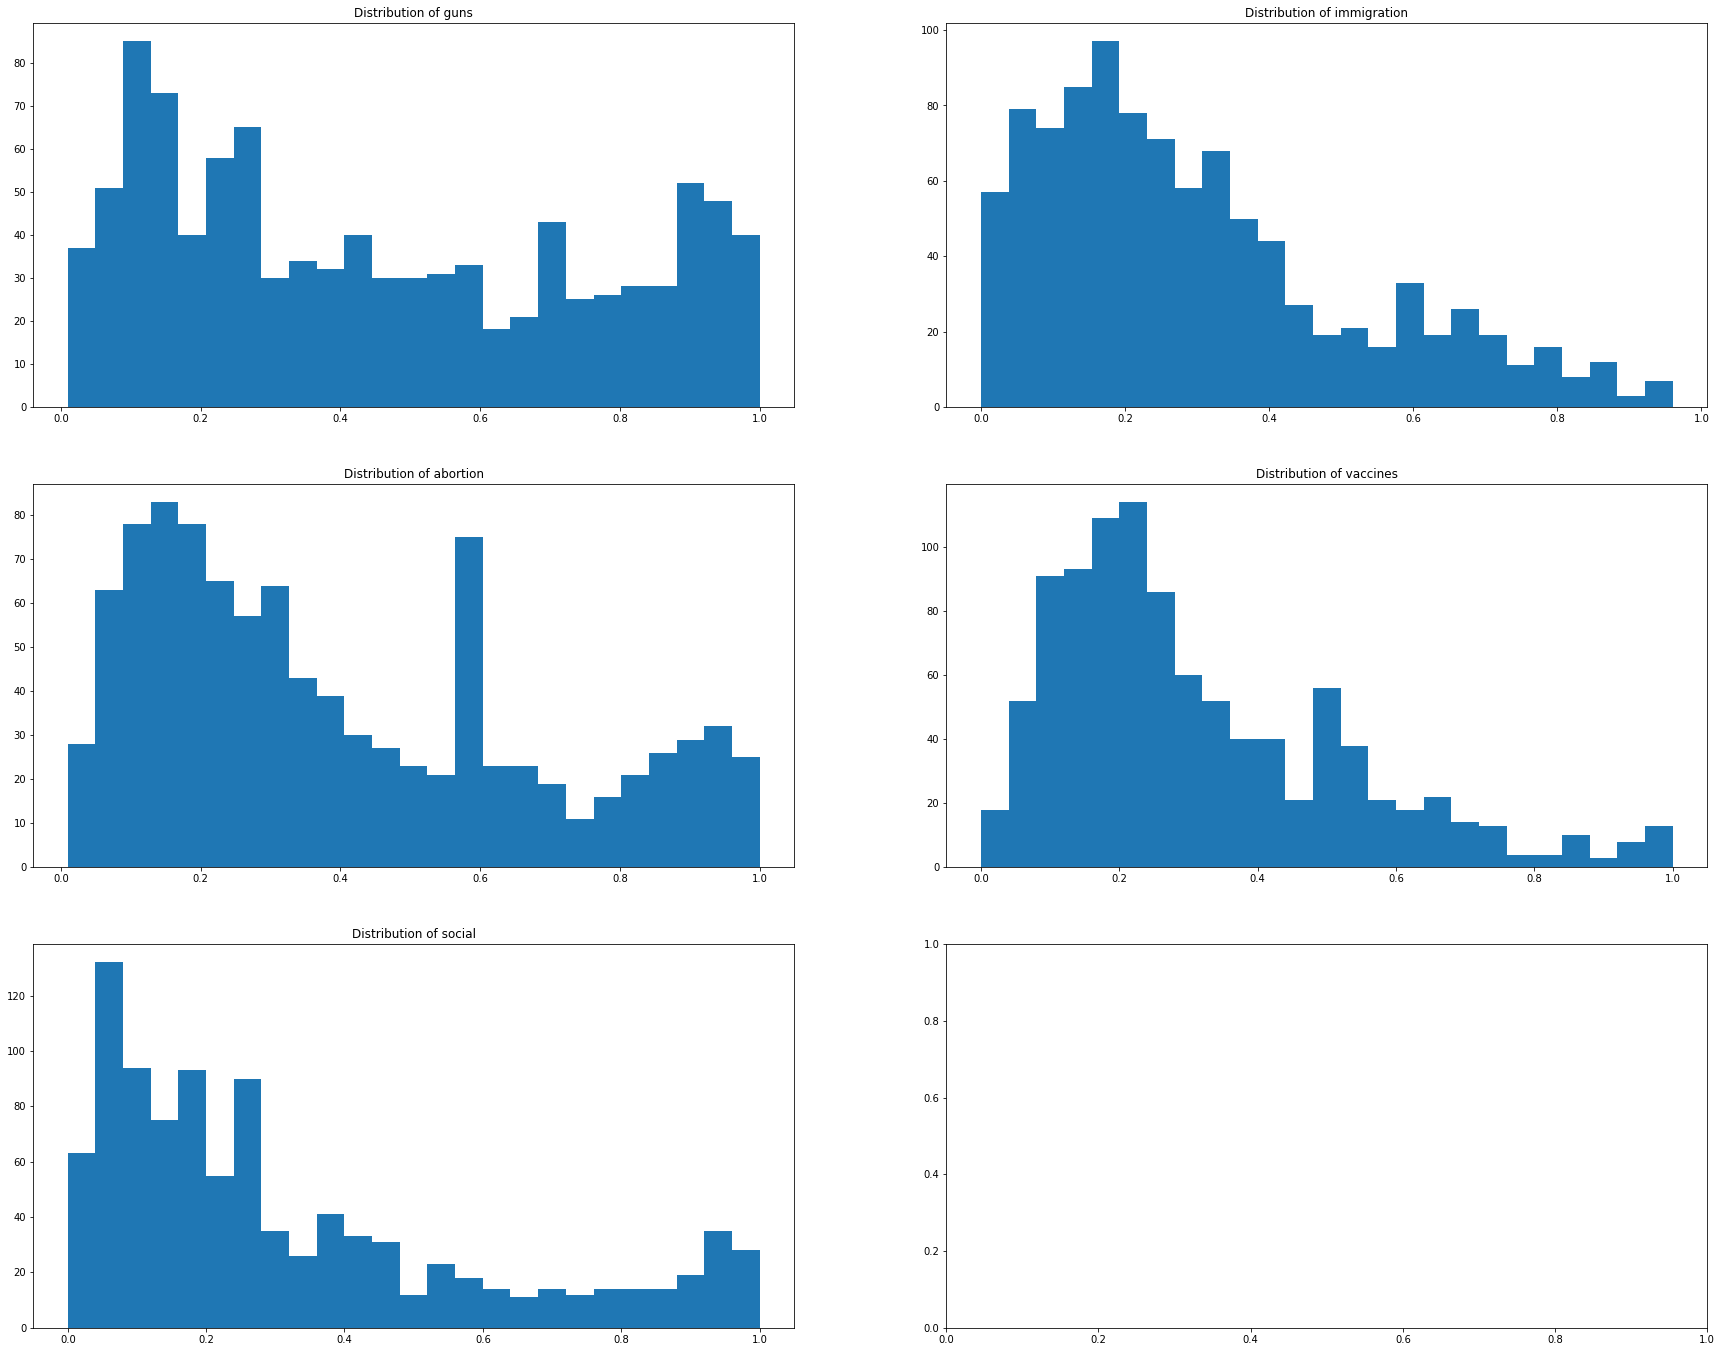

In [ ]:
import matplotlib.pyplot as plt
import math 
def create_subplots(number_of_subplots):
  num_rows = math.floor((1+number_of_subplots)/2)
  WIDTH_IN_INCHES = 30
  HEIGHT_IN_INCHES_PER_ROW = 8
  fig, axs = plt.subplots(num_rows,2)
  fig.set_size_inches(WIDTH_IN_INCHES,HEIGHT_IN_INCHES_PER_ROW * num_rows)

  return fig, axs

def plot_distribution_by_field(df,field_name,title,ax):
  values = list(df[field_name])

  ax.hist(values, bins=25)
  ax.set_title(f'Distribution of {title}')

def display_features(data_frames,field,titles):
  number_of_subplots=len(data_frames)
  fig,axs = create_subplots(number_of_subplots)

  for index in range(0,number_of_subplots):
    row = math.floor(index/2)
    column = index % 2
    
    df = data_frames[index]
    ax = axs[row,column]
    title = titles[index]
    plot_distribution_by_field(df,field,title,ax)

display_features([guns,immigration,abortion,vaccines,social],'english_score',['guns','immigration','abortion','vaccines','social'])

(array([37., 51., 85., 73., 40., 58., 65., 30., 34., 32., 40., 30., 30.,
        31., 33., 18., 21., 43., 25., 26., 28., 28., 52., 48., 40.]),
 array([0.01  , 0.0496, 0.0892, 0.1288, 0.1684, 0.208 , 0.2476, 0.2872,
        0.3268, 0.3664, 0.406 , 0.4456, 0.4852, 0.5248, 0.5644, 0.604 ,
        0.6436, 0.6832, 0.7228, 0.7624, 0.802 , 0.8416, 0.8812, 0.9208,
        0.9604, 1.    ]),
 <a list of 25 Patch objects>)

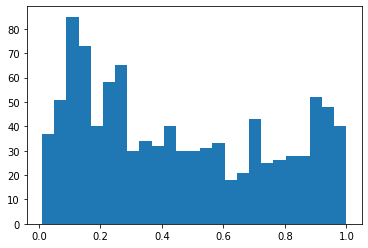

In [ ]:
import matplotlib.pyplot as plt
plt.hist(list(guns.english_score), bins=25)

(array([28., 63., 78., 83., 78., 65., 57., 64., 43., 39., 30., 27., 23.,
        21., 75., 23., 23., 19., 11., 16., 21., 26., 29., 32., 25.]),
 array([0.01  , 0.0496, 0.0892, 0.1288, 0.1684, 0.208 , 0.2476, 0.2872,
        0.3268, 0.3664, 0.406 , 0.4456, 0.4852, 0.5248, 0.5644, 0.604 ,
        0.6436, 0.6832, 0.7228, 0.7624, 0.802 , 0.8416, 0.8812, 0.9208,
        0.9604, 1.    ]),
 <a list of 25 Patch objects>)

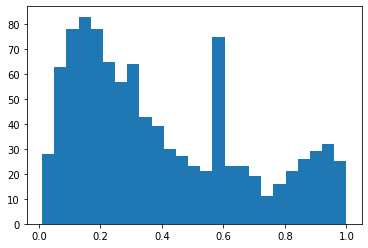

In [ ]:
plt.hist(list(abortion.english_score), bins=25)

(array([ 18.,  52.,  91.,  93., 109., 114.,  86.,  60.,  52.,  40.,  40.,
         21.,  56.,  38.,  21.,  18.,  22.,  14.,  13.,   4.,   4.,  10.,
          3.,   8.,  13.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

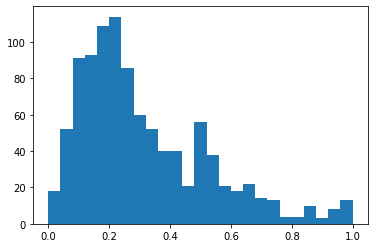

In [ ]:
plt.hist(list(vaccines.english_score), bins=25)

(array([57., 79., 74., 85., 97., 78., 71., 58., 68., 50., 44., 27., 19.,
        21., 16., 33., 19., 26., 19., 11., 16.,  8., 12.,  3.,  7.]),
 array([0.    , 0.0384, 0.0768, 0.1152, 0.1536, 0.192 , 0.2304, 0.2688,
        0.3072, 0.3456, 0.384 , 0.4224, 0.4608, 0.4992, 0.5376, 0.576 ,
        0.6144, 0.6528, 0.6912, 0.7296, 0.768 , 0.8064, 0.8448, 0.8832,
        0.9216, 0.96  ]),
 <a list of 25 Patch objects>)

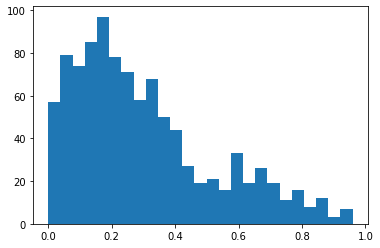

In [ ]:
plt.hist(list(immigration.english_score), bins=25)

(array([ 63., 132.,  94.,  75.,  93.,  55.,  90.,  35.,  26.,  41.,  33.,
         31.,  12.,  23.,  18.,  14.,  11.,  14.,  12.,  14.,  14.,  14.,
         19.,  35.,  28.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

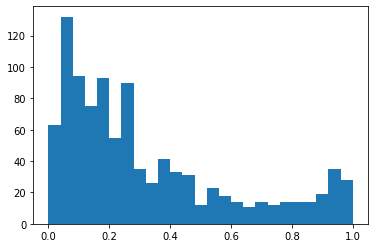

In [ ]:
plt.hist(list(social.english_score), bins=25)

In [ ]:
guns.english_score.describe()

count    998.000000
mean       0.451443
std        0.306481
min        0.010000
25%        0.170000
50%        0.400000
75%        0.720000
max        1.000000
Name: english_score, dtype: float64

## P-value

non-parametric ANOVA

In [ ]:
from scipy import stats

stats.kruskal(guns.english_score, abortion.english_score, vaccines.english_score, immigration.english_score, social.english_score)

KruskalResult(statistic=185.5234454494957, pvalue=4.854240250531079e-39)

### P-values, all combos

In [ ]:
combined_df = pd.DataFrame(list(zip(list(guns.english_score), list(abortion.english_score),
                                    list(vaccines.english_score), list(immigration.english_score), list(social.english_score))),
               columns =['guns', 'abortion', 'vaccines', 'immigration', 'social'])

In [ ]:
combined_df.mean()

guns           0.451687
abortion       0.395703
vaccines       0.309116
immigration    0.302199
social         0.317490
dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu

data = [list(guns.english_score), list(abortion.english_score),
list(vaccines.english_score), list(immigration.english_score), list(social.english_score)]

topics = ['guns', 'abortion', 'vaccines', 'immigration', 'social']

p_values_df = pd.DataFrame()
p_values_df.columns = []
# p_values_df.columns = ['Topic 1', 'Topic 2','p-value']


#being lazy to print the string, clean this up later
i=0
for topic in data:
  j=0
  for topic2 in data:
    U1, p = mannwhitneyu(topic, topic2)
    # print(f"The p-value for {topics[i]} and {topics[j]} is {p}")
    p_values_df=p_values_df.append({'Topic 1':topics[i],'Topic 2':topics[j],'p-value':p},ignore_index=True)
    j+=1
  i+=1

p_values_df

,Topic 1,Topic 2,p-value
0,guns,guns,4.999845e-01
1,guns,abortion,1.808033e-04
2,guns,vaccines,3.440542e-21
3,guns,immigration,2.614375e-25
4,guns,social,9.988253e-25
5,abortion,guns,1.808033e-04
6,abortion,abortion,4.999845e-01
7,abortion,vaccines,6.683872e-10
8,abortion,immigration,1.766426e-12
9,abortion,social,1.429767e-14
